<img src='https://github.com/LinkedEarth/Logos/raw/master/PYLEOCLIM_logo_HORZ-01.png' width="800">

# Working with multiple records: `MultipleSeries` and `EnsembleSeries`

## Authors

Jordan Landers1, Julien Emile-Geay2

Author1 = {"name": "Jordan Landers", "affiliation": "Department of Earth Sciences, University of Southern
California", "email": "lplander@usc.edu", "orcid": "0000-0001-9772-7617"}
Author2 = {"name": "Julien Emile-Geay", "affiliation": "Department of Earth Sciences, University of Southern California", "email": "julieneg@usc.edu", "orcid": "0000-0001-5920-4751"}


## Preamble

### Introduction:
In many cases we are interested in looking at, and thinking about, multiple time series at the same time. Here we introduce the [MultipleSeries](https://pyleoclim-util.readthedocs.io/en/latest/core/api.html#multipleseries-pyleoclim-multipleseries) object, which serves as the basis of the various analysis techniques that apply specifically to analyzing and visualizing multiple [Series](https://pyleoclim-util.readthedocs.io/en/latest/core/api.html#series-pyleoclim-series) objects. We also look at the [EnsembleSeries](https://pyleoclim-util.readthedocs.io/en/latest/core/api.html#ensembleseries-pyleoclim-ensembleseries), a child class of `MultipleSeries` with further capabilities. 

### Goals:

* Learn to create a `MultipleSeries` and work with `common_time()`
* Learn to create and customize a stackplot
* Learn to create an `EnsembleSeries`
* Learn to visualize an `EnsembleSeries`


**Reading Time:**

10 minutes

### Keywords
Visualization, Ensembles, stacks

### Pre-requisites

None. This tutorial assumes basic knowledge of Python. If you are not familiar with this coding language, check out this tutorial: http://linked.earth/ec_workshops_py/.

### Relevant Packages

Xarray

## Data Description

* LiPD files are from the Euro2k database, a subset of the PAGES 2k version 2.0.0 dataset, published by PAGES 2k Consortium, A global multiproxy database for temperature reconstructions of the Common Era. Sci Data 4, 170088 (2017). https://doi.org/10.1038/sdata.2017.88

* Reconstructions of global mean surface temperature are from PAGES 2k Consortium (Neukom, R., L. A. Barboza, M. P. Erb, F. Shi, J. Emile-Geay, M. N. Evans, J. Franke, D. S. Kaufman, L. Lücke, K. Rehfeld, A. Schurer, F. Zhu, S. Br ̈onnimann, G. J. Hakim, B. J. Henley, F. C. Ljungqvist, N. McKay, V. Valler, and L. von Gunten), 2019: Consistent multidecadal variability in global temperature reconstructions and simulations over the common era, Nature Geoscience, 12(8), 643–649, https://doi.org/10.1038/s41561-019-0400-0. 

## Demonstration
First, we import our favorite package:

In [1]:
import pyleoclim as pyleo
import xarray as xr

### MultipleSeries

#### Load a sample dataset
For more details on working with LiPD files, read the []() tutorial.  Briefly, below we load the LiPD files located in
 the _Euro2k_ directory and then create a list of those records taken from corals.

In [2]:
d_euro = pyleo.Lipd('../data/Euro2k')

/var/folders/bf/_x19bm694857h_hrw44j0p7w0000gn/T/ipykernel_42817/2701317407.py:1: DeprecationWarning: The Lipd class is being deprecated and will be removed in Pyleoclim v1.0.0. Functionalities will instead be handled by the pyLipd package.
  d_euro = pyleo.Lipd('../data/Euro2k')


Disclaimer: LiPD files may be updated and modified to adhere to standards

Found: 31 LiPD file(s)
reading: Ocn-RedSea.Felis.2000.lpd
reading: Arc-Forfjorddalen.McCarroll.2013.lpd
reading: Eur-Tallinn.Tarand.2001.lpd
reading: Eur-CentralEurope.Dobrovoln.2009.lpd
reading: Eur-EuropeanAlps.Bntgen.2011.lpd
reading: Eur-CentralandEasternPyrenees.Pla.2004.lpd
reading: Arc-Tjeggelvas.Bjorklund.2012.lpd
reading: Arc-Indigirka.Hughes.1999.lpd
reading: Eur-SpannagelCave.Mangini.2005.lpd
reading: Ocn-AqabaJordanAQ19.Heiss.1999.lpd
reading: Arc-Jamtland.Wilson.2016.lpd
reading: Eur-RAPiD-17-5P.Moffa-Sanchez.2014.lpd
reading: Eur-LakeSilvaplana.Trachsel.2010.lpd
reading: Eur-NorthernSpain.Martn-Chivelet.2011.lpd
reading: Eur-MaritimeFrenchAlps.Bntgen.2012.lpd
reading: Ocn-AqabaJordanAQ18.Heiss.1999.lpd
reading: Arc-Tornetrask.Melvin.2012.lpd
reading: Eur-EasternCarpathianMountains.Popa.2008.lpd
reading: Arc-PolarUrals.Wilson.2015.lpd
reading: Eur-LakeSilvaplana.Larocque-Tobler.2010.lpd
reading: Eur

In [3]:
ts_list_euro = d_euro.to_tso()
indices = []
for idx, item in enumerate(ts_list_euro):
    if 'archiveType' in item.keys(): #check that it is available to avoid errors on the loop
        if item['archiveType'] == 'coral': #if it's a coral, then proceed to the next step
            if item['paleoData_variableName'] in ['d13C','d18O']:
                indices.append(idx)

ts_list_euro_coral =[]

for i in indices:
    ts_list_euro_coral.append(pyleo.LipdSeries(ts_list_euro[i]))

extracting paleoData...
extracting: Ocn-RedSea.Felis.2000
extracting: Arc-Forfjorddalen.McCarroll.2013
extracting: Eur-Tallinn.Tarand.2001
extracting: Eur-CentralEurope.Dobrovolný.2009
extracting: Eur-EuropeanAlps.Büntgen.2011
extracting: Eur-CentralandEasternPyrenees.Pla.2004
extracting: Arc-Tjeggelvas.Bjorklund.2012
extracting: Arc-Indigirka.Hughes.1999
extracting: Eur-SpannagelCave.Mangini.2005
extracting: Ocn-AqabaJordanAQ19.Heiss.1999
extracting: Arc-Jamtland.Wilson.2016
extracting: Eur-RAPiD-17-5P.Moffa-Sanchez.2014
extracting: Eur-LakeSilvaplana.Trachsel.2010
extracting: Eur-NorthernSpain.Martín-Chivelet.2011
extracting: Eur-MaritimeFrenchAlps.Büntgen.2012
extracting: Ocn-AqabaJordanAQ18.Heiss.1999
extracting: Arc-Tornetrask.Melvin.2012
extracting: Eur-EasternCarpathianMountains.Popa.2008
extracting: Arc-PolarUrals.Wilson.2015
extracting: Eur-LakeSilvaplana.Larocque-Tobler.2010
extracting: Eur-CoastofPortugal.Abrantes.2011
extracting: Eur-TatraMountains.Büntgen.2013
extracting: 

/var/folders/bf/_x19bm694857h_hrw44j0p7w0000gn/T/ipykernel_42817/679311843.py:12: DeprecationWarning: The LipdSeries class is being deprecated and will be removed in Pyleoclim v1.0.0. It will be replaced by the geoSeries class (currently in development).
  ts_list_euro_coral.append(pyleo.LipdSeries(ts_list_euro[i]))


To create a `pyleo.MultipleSeries`, simply pass a collection of `pyleo.Series` objects. (In this case, we are passing a
list
 of
`pyleo.LipdSeries`, which works because a `pyleo.LipdSeries` is a special type of `pyleo.Series`.)

In [4]:
redsea_corals = pyleo.MultipleSeries(ts_list_euro_coral, label='Red Sea Corals', time_unit='year CE')

There are a number of useful methods available to quickly learn about our set of records.
For example, `.equal_length()` is a quick way to see if the records are the same length.

In [5]:
redsea_corals.equal_lengths()

(False, [1468, 107, 107, 206, 206])

`.equal_lengths()` usefully returns a `True`/`False` and the length of each record. In this case, they are not, which we can visualize by plotting them using `.stackplot()`:

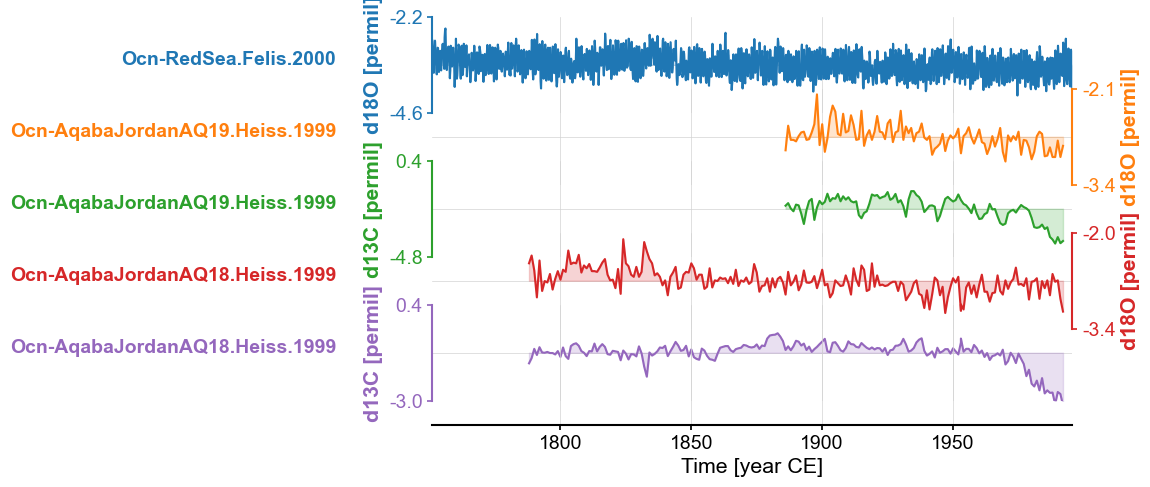

In [6]:
fig, ax = redsea_corals.stackplot()

Pyleoclim also allows you to plot the `MultipleSeries` as warming stripes:

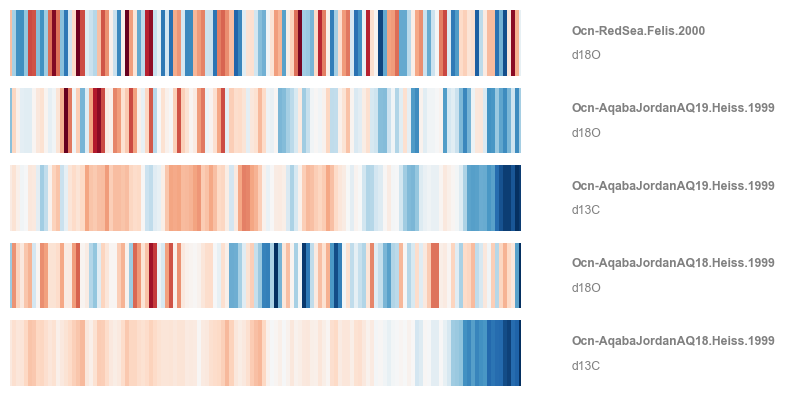

In [7]:
fig,ax = redsea_corals.stripes(ref_period=(1950,2000), figsize=(8,4))

Remember that $\delta^{18}O$ becomes more negative as temperature increases, hence the warming stripes on this figure are "reversed", with warmer temperatures in blue. You could also use the `.flip()` function to flip the y axis of individual Series objects. Finally, note that [stripes()](https://pyleoclim-util.readthedocs.io/en/latest/core/api.html#pyleoclim.core.multipleseries.MultipleSeries.stripes) admits several colormaps. For instance: 

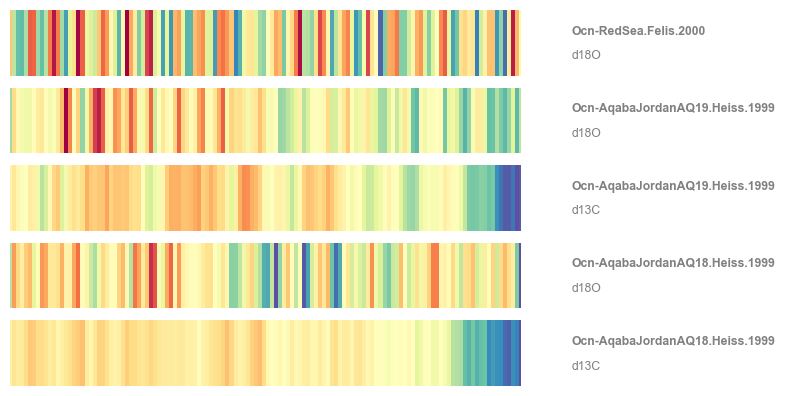

In [8]:
fig,ax = redsea_corals.stripes(ref_period=(1950,2000), figsize=(8,4), cmap='Spectral_r')

If we wanted to place the records on a shared time axis with a common sampling frequency and focus on the interval shared by all
records in the `MultipleSeries`, we could apply `.common_time()`.

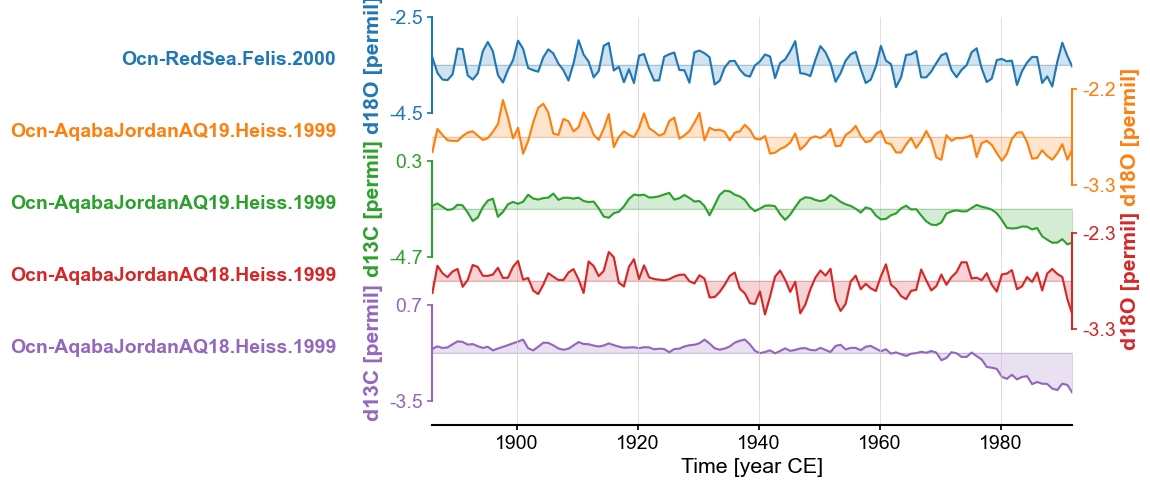

In [9]:
redsea_corals_ct = redsea_corals.common_time()
fig, ax = redsea_corals_ct.stackplot()

By default, `.common_time()` interpolates and infers spacing from the records involved and returns a `MultipleSeries` that spans the full shared interval. However, these parameters can be tuned. For example, in addition to interpolation, it also allows binning and a Gaussian kernel. Downsampling is a simple matter of specifying the preferred value for `step`, and focusing in on a subinterval of the shared interval is only a matter of assigning relevant date values to `start` and `stop`. 
 For more information see
 [documentation on `common_time()`](https://pyleoclim-util.readthedocs.io/en/latest/core/api.html?highlight=stackplot#pyleoclim.core.multipleseries.MultipleSeries.common_time).


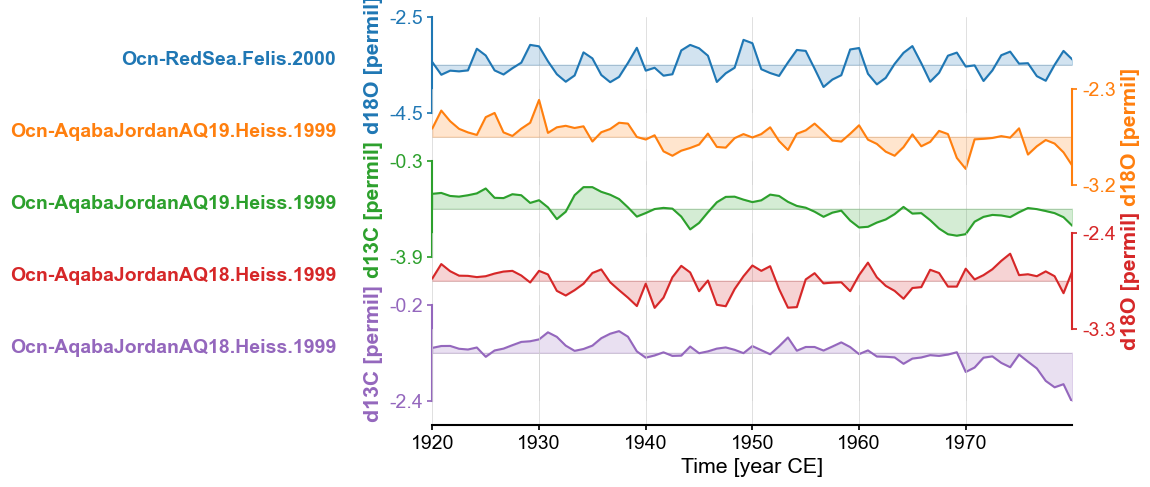

In [10]:
redsea_corals_ct = redsea_corals.common_time(start=1920, stop=1980)
fig, ax = redsea_corals_ct.stackplot()

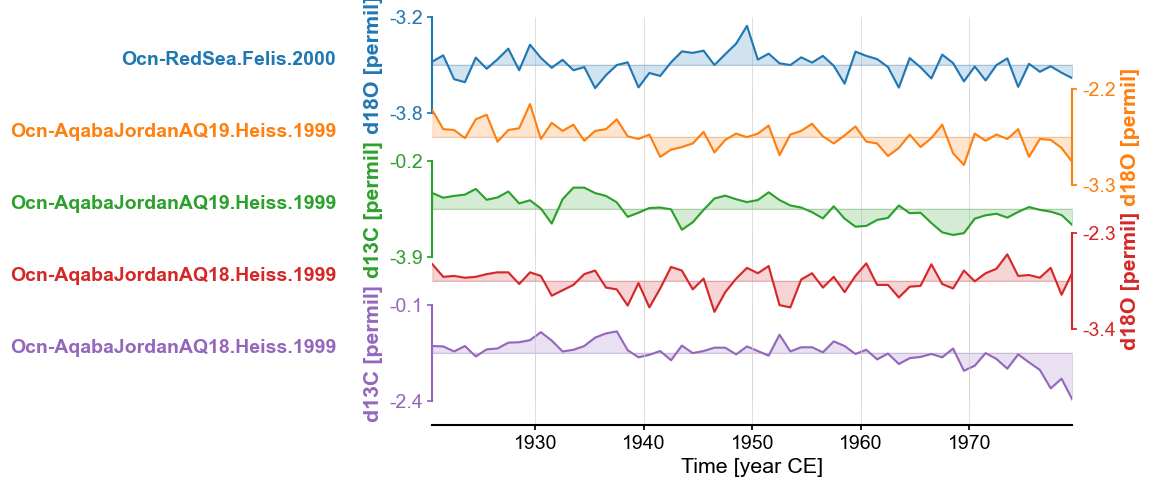

In [11]:
redsea_corals_ct = redsea_corals.common_time(method = 'bin', step=1, start=1920, stop=1980)
fig, ax = redsea_corals_ct.stackplot()

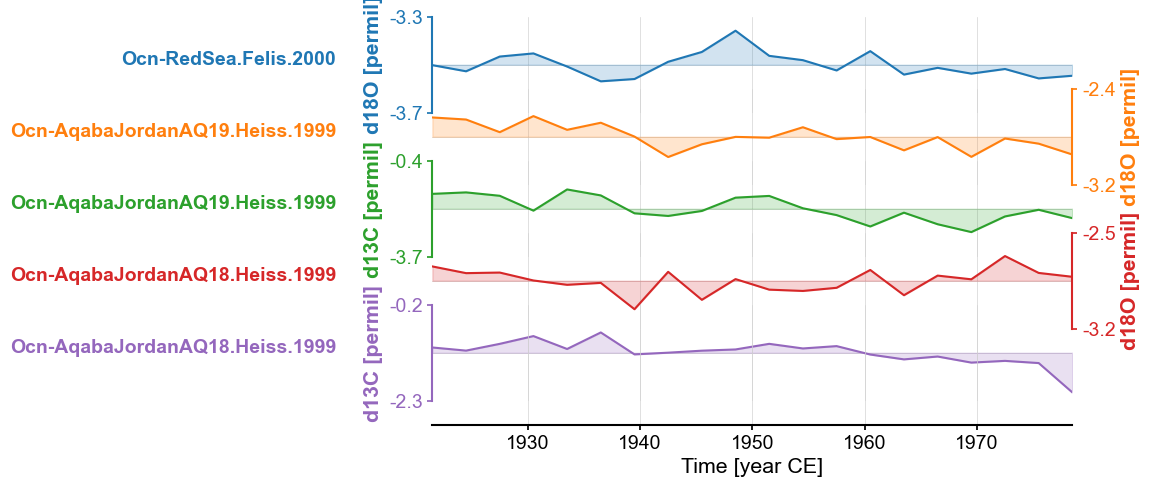

In [12]:
redsea_corals_ct = redsea_corals.common_time(step=3, start=1920, stop=1980, method='gkernel')
fig, ax = redsea_corals_ct.stackplot()

#### Tuning a stackplot
##### Labels
The labels attached to each record in the stackplot above are a bit unweildy. To make them a bit more readable, we
can pass a list of labels to `labels`.

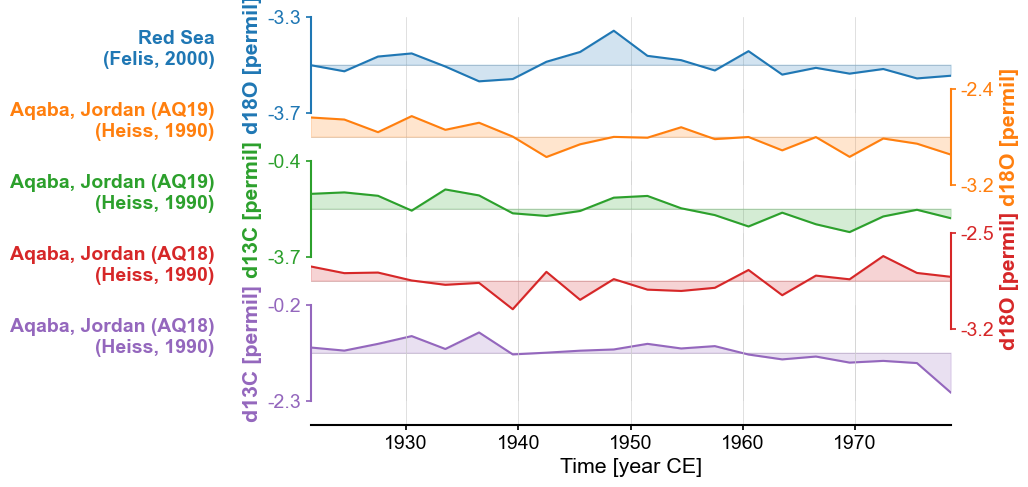

In [13]:
fig, ax = redsea_corals_ct.stackplot(labels=['Red Sea\n(Felis, 2000)',
                                             'Aqaba, Jordan (AQ19)\n(Heiss, 1990)',
                                             'Aqaba, Jordan (AQ19)\n(Heiss, 1990)',
                                             'Aqaba, Jordan (AQ18)\n(Heiss, 1990)',
                                             'Aqaba, Jordan (AQ18)\n(Heiss, 1990)'])

Alternatively, we could remove the labels entirely by setting `labels` to `None`.


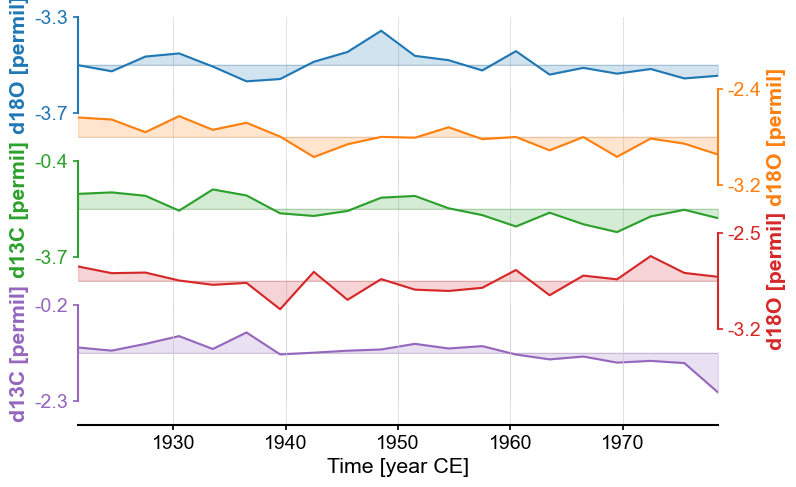

In [14]:
fig, ax = redsea_corals_ct.stackplot(labels=None)

##### Color
If we want to change the colors to a set other than the default
([tab10](https://matplotlib.org/stable/tutorials/colors/colormaps.html#qualitative)), we can pass a list of Python
supported color codes (one or more strings of hex code, or tuples of rgba values)) to `colors`. If the list is
shorter than the number of records, the plot will simply cycle through them.

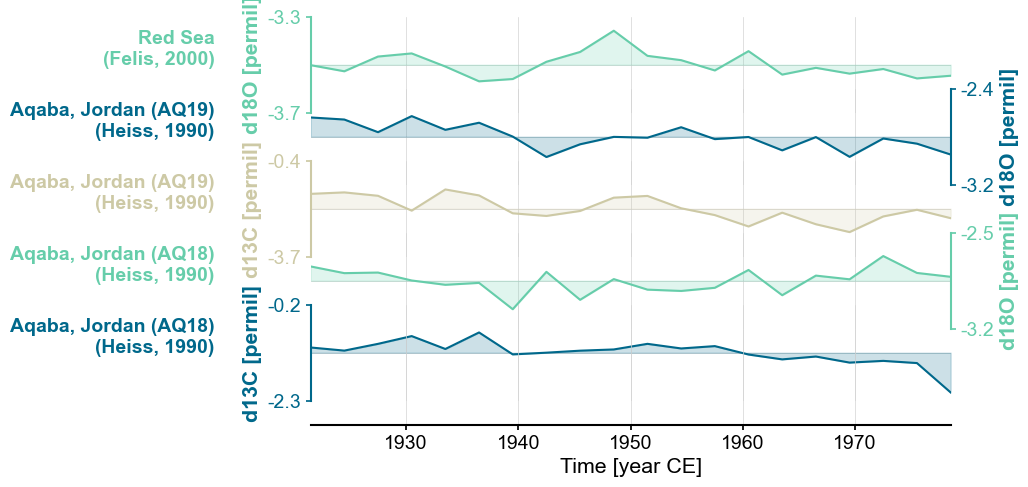

In [15]:
fig, ax = redsea_corals_ct.stackplot(labels=['Red Sea\n(Felis, 2000)',
                                             'Aqaba, Jordan (AQ19)\n(Heiss, 1990)',
                                             'Aqaba, Jordan (AQ19)\n(Heiss, 1990)',
                                             'Aqaba, Jordan (AQ18)\n(Heiss, 1990)',
                                             'Aqaba, Jordan (AQ18)\n(Heiss, 1990)'],
                                                colors=['#66CDAA', '#00688B', '#CDC9A5'])

Alternatively, we can pass a color map and let pyleoclim figure out how to specify the colors. More information about
 color maps is available in this [Matplotlib tutorial](https://matplotlib.org/stable/tutorials/colors/colormaps.html)
  on the subject. While it is possible to create colormaps from scratch, let's go with `tab20`. (Custom colormaps
  are left as an exercise to the intrepid reader.)


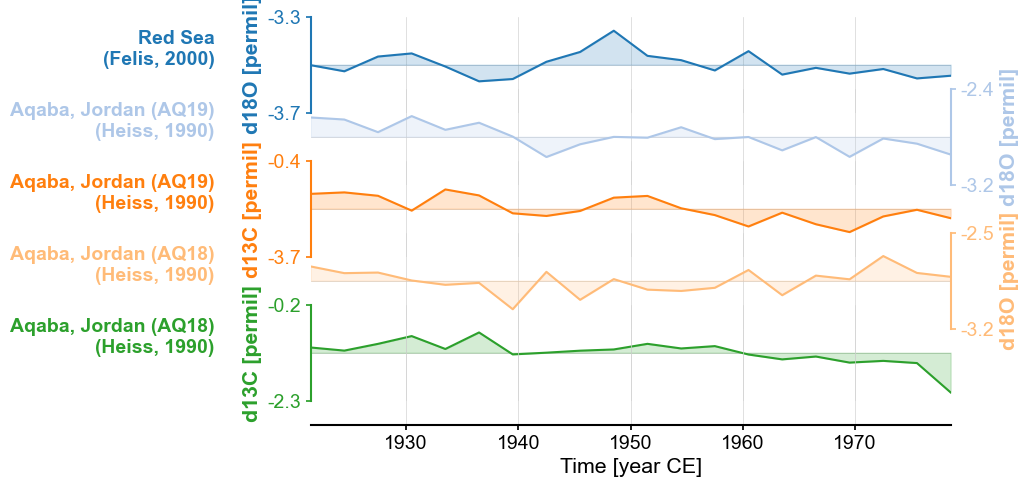

In [16]:
fig, ax = redsea_corals_ct.stackplot(labels=['Red Sea\n(Felis, 2000)',
                                             'Aqaba, Jordan (AQ19)\n(Heiss, 1990)',
                                             'Aqaba, Jordan (AQ19)\n(Heiss, 1990)',
                                             'Aqaba, Jordan (AQ18)\n(Heiss, 1990)',
                                             'Aqaba, Jordan (AQ18)\n(Heiss, 1990)'],
                                              cmap='tab20')

## Using shorthands
Notice how earlier we used the `pyleo.MultipleSeries([list])` syntax to bundle a list of Series objects into a MultipleSeries object. 
Here we showcase easier shorthands to create and manipulate [MultipleSeries](https://pyleoclim-util.readthedocs.io/en/latest/core/api.html#multipleseries-pyleoclim-multipleseries) objects. First, let's load a few records covering part of the Plio-Pleistocene:

In [17]:
co2ts = pyleo.utils.load_dataset('AACO2')
lr04 = pyleo.utils.load_dataset('LR04')
edc = pyleo.utils.load_dataset('EDC-dD')

We then create a `MultipleSeries` object using the `&` shorthand:

In [18]:
ms = lr04.flip() & edc & co2ts
type(ms)

The two series have different lengths, left: 2115 vs right: 1901
Metadata are different:
value_unit property -- left: ‰, right: ppm
value_name property -- left: $\delta^{18} \mathrm{O}$ x (-1), right: $CO_2$
label property -- left: LR04 benthic stack, right: EPICA Dome C CO2
archiveType property -- left: Marine Sediment, right: Glacier Ice
importedFrom property -- left: None, right: https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/antarctica2015co2composite.txt
The two series have different lengths, left: 5785 vs right: 1901
Metadata are different:
time_unit property -- left: y BP, right: ky BP
value_unit property -- left: ‰, right: ppm
value_name property -- left: $\delta \mathrm{D}$, right: $CO_2$
label property -- left: EPICA Dome C deuterium, right: EPICA Dome C CO2
importedFrom property -- left: https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/edc3deuttemp2007.txt, right: https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/antarctica2015co

pyleoclim.core.multipleseries.MultipleSeries

Do not be alarmed by this text output ; it merely checks that the series are different prior to putting them together, so as to avoid duplicates. As with Series, there are two display options. The first is a barebones visualization of the associated dataframe:

In [19]:
ms

                         LR04 benthic stack  EPICA Dome C deuterium   
datetime                                                              
-5318046-05-22 11:46:11               -2.91                     NaN  \
-5313046-05-20 11:37:24               -2.84                     NaN   
-5308046-05-19 11:28:37               -2.79                     NaN   
-5303046-05-17 11:19:50               -2.79                     NaN   
-5298046-05-16 11:11:03               -2.91                     NaN   
...                                     ...                     ...   
1993-01-29 15:12:50                     NaN                     NaN   
1994-05-30 09:44:42                     NaN                     NaN   
1996-04-12 09:48:54                     NaN                     NaN   
1997-12-31 15:00:46                     NaN                     NaN   
2001-01-11 07:25:32                     NaN                     NaN   

                         EPICA Dome C CO2  
datetime                        

The second will look like a nicely formatted table in the Jupyter context:

In [20]:
ms.view()

,LR04 benthic stack,EPICA Dome C deuterium,EPICA Dome C CO2
Age,,,
-0.05103,NaN,NaN,368.02
-0.04800,NaN,NaN,361.78
-0.04628,NaN,NaN,359.65
-0.04441,NaN,NaN,357.11
-0.04308,NaN,NaN,353.95
...,...,...,...
797408.00000,NaN,-440.20,NaN
798443.00000,NaN,-439.00,NaN
799501.00000,NaN,-441.10,NaN


Notice how this option formats the index as a more recognizable variable (in this case, the age, in years BP here). However, when plotted, the units of the first series are used:

(<Figure size 1000x400 with 1 Axes>,
 <Axes: xlabel='Age [ky BP]', ylabel='value'>)

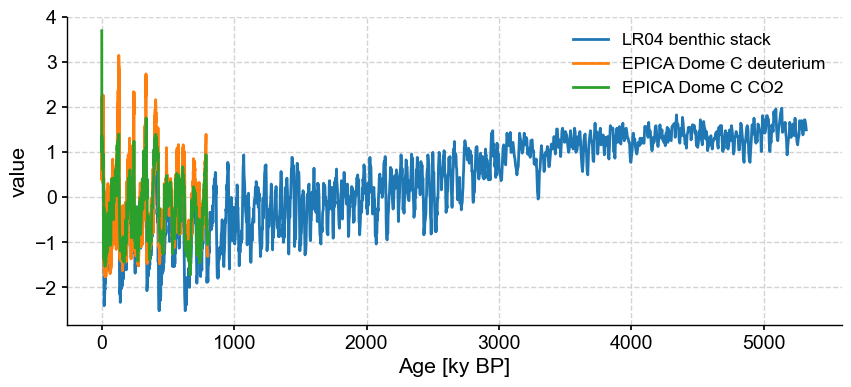

In [21]:
ms.standardize().plot()  

This correctly shows up as "ky BP" in this case. If some of the series in the collection have different units, all that needs to be done is to apply `convert_time_unit()` prior to plotting. Notice that we had flipped the LR04 values upon creating the object, so the values of all series in the `MultipleSeries` vary in unison.

### Adding a series to a MultipleSeries object:

You could add another series to the previous collection using `pyleo.MultipleSeries()`, but it would be rather tedious. 
As of version 0.11.0, this operation can now be done with the "+" operator, which is understood to mean: "add this Series to the existing MultipleSeries object". The method will confirm that you are not adding a series that is already in the MultipleSeries object by comparing it to the contents of the object, pairwise. For instance, let's add the GISP2 timeseries:

The two series have different lengths, left: 2115 vs right: 1390
Metadata are different:
time_unit property -- left: ky BP, right: yr BP
value_name property -- left: $\delta^{18} \mathrm{O}$ x (-1), right: $\delta^{18} \mathrm{O}$
label property -- left: LR04 benthic stack, right: GISP2
archiveType property -- left: Marine Sediment, right: Glacier Ice
importedFrom property -- left: None, right: https://www.ncei.noaa.gov/access/paleo-search/study/17796
The two series have different lengths, left: 5785 vs right: 1390
Metadata are different:
time_unit property -- left: y BP, right: yr BP
value_name property -- left: $\delta \mathrm{D}$, right: $\delta^{18} \mathrm{O}$
label property -- left: EPICA Dome C deuterium, right: GISP2
importedFrom property -- left: https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/edc3deuttemp2007.txt, right: https://www.ncei.noaa.gov/access/paleo-search/study/17796
The two series have different lengths, left: 1901 vs right: 1390
Metadata a

(0.0, 1000.0)

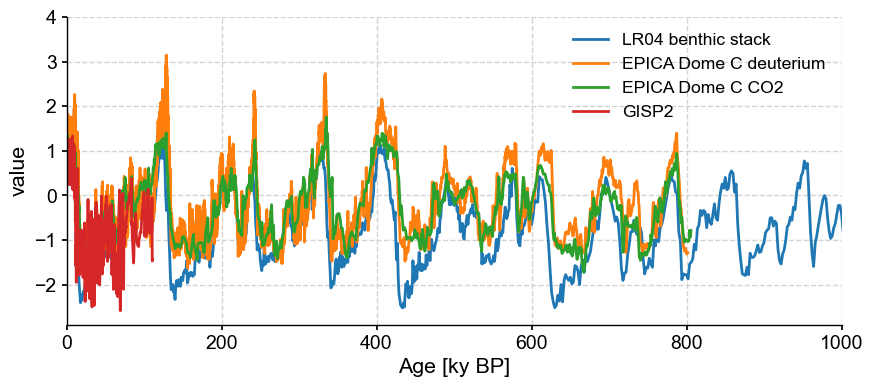

In [22]:
gisp2 = pyleo.utils.load_dataset('GISP2')
ms3 = ms + gisp2 
fig, ax = ms3.standardize().plot()
ax.set_xlim([0, 1000]) # plot only over the past 1 Ma

### Adding two MultipleSeries objects together:

Suppose now I want to add two `MultipleSeries` objects together. There a shorthand for that, intuitively called "+".  Note that the "&" operator would be inappropriate here, as it means _please blundle these `Series` objects into a `MultipleSeries` object_. We'll create a new `MultipleSeries` object called `ms2`, made of the original (unflipped) LR04 and GISP2: 

In [23]:
ms2 = gisp2 & lr04

Let's now add this to `ms`:

In [24]:
mst = ms + ms2

The two series have different lengths, left: 2115 vs right: 1390
Metadata are different:
time_unit property -- left: ky BP, right: yr BP
value_name property -- left: $\delta^{18} \mathrm{O}$ x (-1), right: $\delta^{18} \mathrm{O}$
label property -- left: LR04 benthic stack, right: GISP2
archiveType property -- left: Marine Sediment, right: Glacier Ice
importedFrom property -- left: None, right: https://www.ncei.noaa.gov/access/paleo-search/study/17796
The two series have different lengths, left: 5785 vs right: 1390
Metadata are different:
time_unit property -- left: y BP, right: yr BP
value_name property -- left: $\delta \mathrm{D}$, right: $\delta^{18} \mathrm{O}$
label property -- left: EPICA Dome C deuterium, right: GISP2
importedFrom property -- left: https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/edc3deuttemp2007.txt, right: https://www.ncei.noaa.gov/access/paleo-search/study/17796
The two series have different lengths, left: 1901 vs right: 1390
Metadata a

The two objects have GISP2 in common, which did not fool Pyleoclim: it deftly avoided that redundancy, as you can see here:

(<Figure size 640x480 with 6 Axes>,
 {0: <Axes: ylabel='$\\delta^{18} \\mathrm{O}$ x (-1) [‰]'>,
  1: <Axes: ylabel='$\\delta \\mathrm{D}$ [‰]'>,
  2: <Axes: ylabel='$CO_2$ [ppm]'>,
  3: <Axes: ylabel='$\\delta^{18} \\mathrm{O}$ [‰]'>,
  4: <Axes: ylabel='$\\delta^{18} \\mathrm{O}$ [‰]'>,
  5: <Axes: xlabel='Age [ky BP]'>})

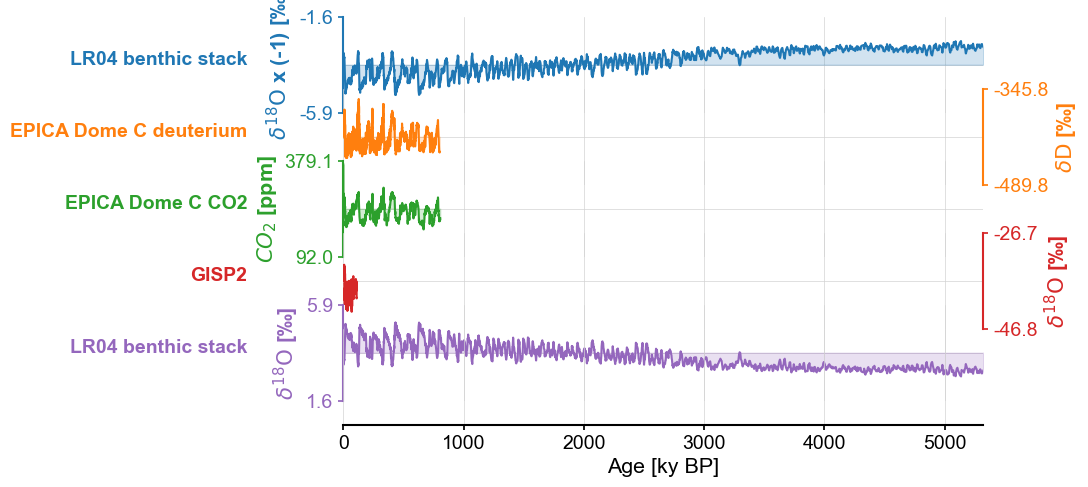

In [25]:
mst.stackplot()

The method considered the two LR04 different (as it should because of their opposite sign), but avoided adding a redundant GISP2.

### Removing a series from a MultipleSeries object:

Conversely, situations may arise in which one wants to remove a series from a `MultipleSeries` collection. the "-" sign can be used to do that, followed by the Series label. Note that the object is modified "in place", not exported to another variable. For instance, removing LR from the just-created `ms3`:

In [26]:
ms3 - lr04.label
print([ts.label for ts in ms3.series_list])

['EPICA Dome C deuterium', 'EPICA Dome C CO2', 'GISP2']


## EnsembleSeries
An `EnsembleSeries` is a special kind of `MultipleSeries`. It is similar in that it is created from a list of
`Series`, but different in that all series are assumed to come from the same generative model, either a gridded field, a Bayesian age model, an initial condition ensemble from a numerical model, etc. As a result, all constituent series in an `EnsembleSeries` object share the same unit for both `value` and `time` properties. By capturing these data in a `pyleo.EnsembleSeries` we can
apply ensemble-specific techniques for analysis and visualization.

#### Creating an `EnsembleSeries` from a NetCDF file
In this case, we will focus on one variable from the [PAGES 2k (2019) reconstructions](https://doi.org/10.1038/s41561-019-0400-0) of global mean surface temperature (GMST) and create an `EnsembleSeries` from a list of `Series` (one for each trace) for the full set of ensemble runs.

In [27]:
file_path = '../data/p2k_ngeo19_recons.nc'
p2k_nc = xr.open_dataset(file_path)
p2k_nc

<xarray.Dataset>
Dimensions:  (year: 2000, ens: 1000)
Coordinates:
  * year     (year) int64 1 2 3 4 5 6 7 8 ... 1994 1995 1996 1997 1998 1999 2000
  * ens      (ens) int64 1 2 3 4 5 6 7 8 9 ... 993 994 995 996 997 998 999 1000
Data variables:
    LMRv2.1  (year, ens) float32 ...
    BHM      (year, ens) float64 ...
    DA       (year, ens) float64 ...
    CPS_new  (year, ens) float64 ...
    CPS      (year, ens) float64 ...
    OIE      (year, ens) float64 ...
    PAI      (year, ens) float64 ...
    PCR      (year, ens) float64 ...
    M08      (year, ens) float64 ...

In [28]:
variable_name = 'LMRv2.1'
ens_grps = p2k_nc.groupby('ens')
traces = []

for im in range(len(p2k_nc.ens)):
    ens_run = ens_grps[im+1].data_vars[variable_name]
    traces.append(pyleo.Series(time=p2k_nc.year, value=ens_run,
                    time_name='Time', time_unit='year',
                    value_name='GMST', value_unit='$^{\circ}$C', 
                    verbose=False))
lmr_ens = pyleo.EnsembleSeries(traces)

#### Plot traces
In some cases, it can be informative to look at a set of individual traces. By default, `.plot_traces()` plots ten traces, but it is simple enough to set `num_traces` to another choice value.  The traces (however many) are chosen at random among the ensemble.  Random number generators start from a [seed](https://en.wikipedia.org/wiki/Random_seed) number, so if it is important that the function yields the same plot each time it is rerun, set a value for `seed` (always an integer).   

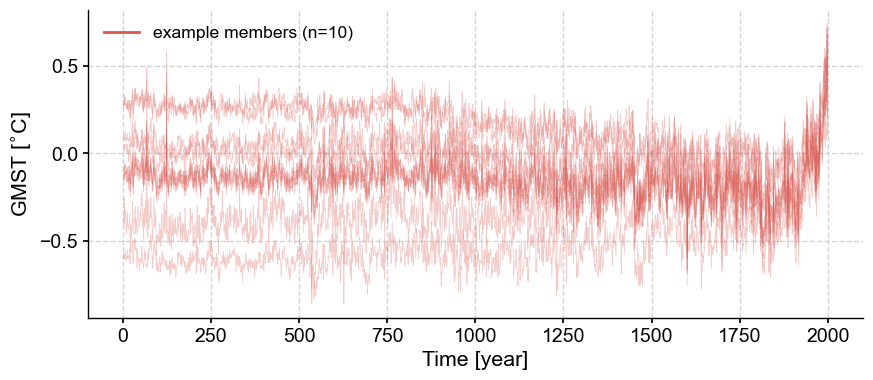

In [29]:
fig, ax = lmr_ens.plot_traces(seed=2110)

You can see it looks different with a seed of 42, despite the [number's cosmic importance](https://www.scientificamerican.com/article/for-math-fans-a-hitchhikers-guide-to-the-number-42/). 

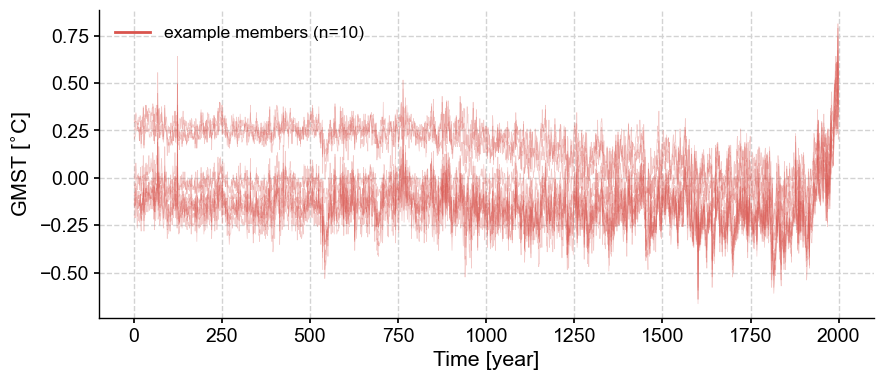

In [30]:
fig, ax = lmr_ens.plot_traces(seed=42)

#### Plot envelope
Instead of looking at the full set of traces, it can be useful to look at an envelope that highlights various  features of the evolving distribution of the ensemble over time. By default, the quantiles displayed are [0.025, 0.25, 0.5, 0.75, 0.975], which means that it shows  95% confidence interval, the interquartile range (IQR), and the median. This plot can be customized for a different set of significance levels by passing a list of values to the parameter `qs`, in addition to various color, opacity, line style and label values.  

(<Figure size 1000x400 with 1 Axes>,
 <Axes: title={'center': 'Default envelope'}, xlabel='Time [year]', ylabel='GMST [$^{\\circ}$C]'>)

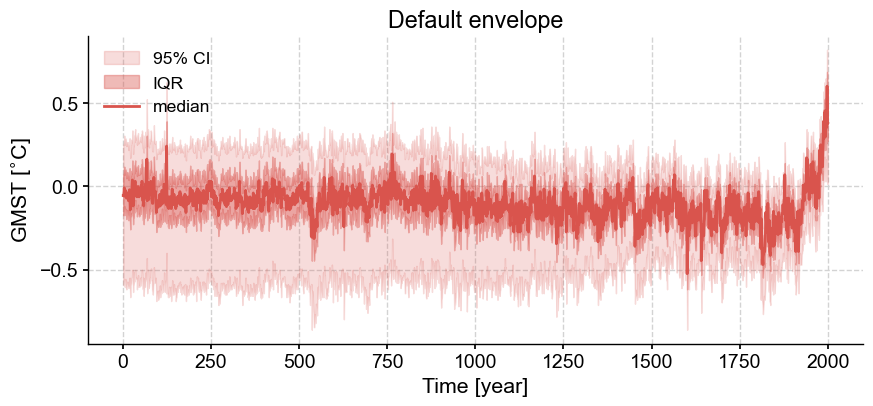

In [31]:
lmr_ens.plot_envelope(title='Default envelope') 

(<Figure size 1000x400 with 1 Axes>,
 <Axes: title={'center': 'Some customization'}, xlabel='Time [year]', ylabel='GMST [$^{\\circ}$C]'>)

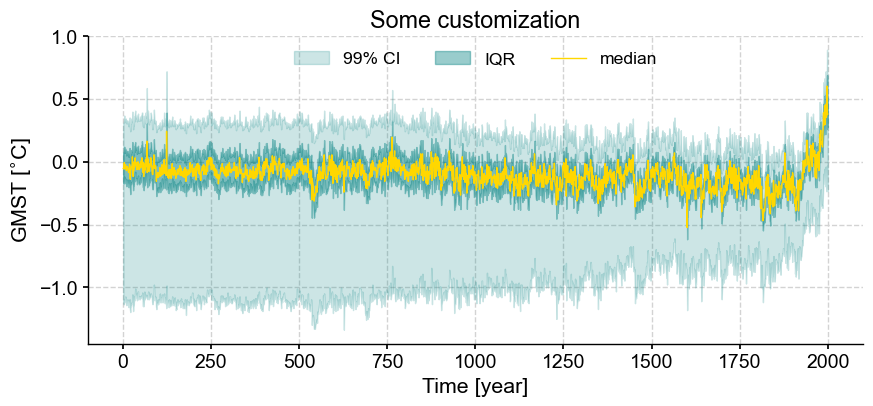

In [32]:
lmr_ens.plot_envelope(qs = [0.005, 0.25, 0.5, 0.75, 0.995], curve_lw=1,
                      shade_clr = 'teal', curve_clr='gold', 
                      lgd_kwargs={'ncol':3,'loc':'upper center'},
                      outer_shade_label='99% CI', title='Some customization') 

#### Ensemble spectrum

the beauty of such an object is that one can apply a complex workflow (e.g. spectral analysis) recursively with one command line. For instance, spectral analysis:

In [33]:
lmr_psd = lmr_ens.spectral(method='mtm')

Performing spectral analysis on individual series: 100%|██████████| 1000/1000 [00:58<00:00, 17.07it/s]


This is a [MultiplePSD](https://pyleoclim-util.readthedocs.io/en/latest/core/api.html#multiplepsd-pyleoclim-multiplepsd) object, which has a dedicated `plot()` method working much like `MultipleSeries.plot()`:

(<Figure size 1000x400 with 1 Axes>,
 <Axes: xlabel='Period [yrs]', ylabel='PSD'>)

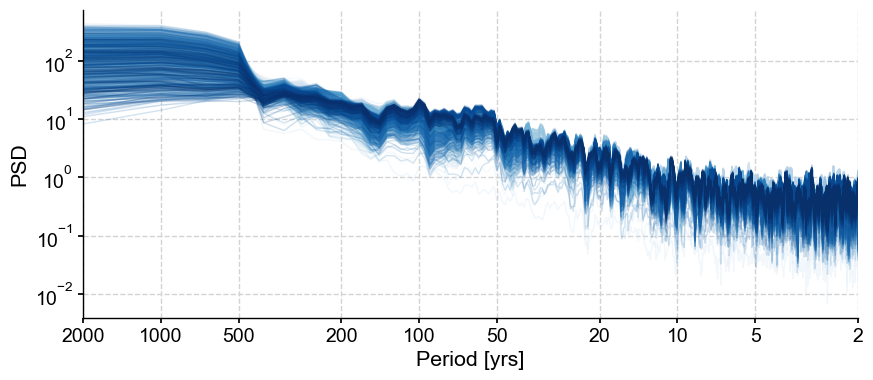

In [34]:
lmr_psd.plot(cmap='Blues',plot_kwargs={'linewidth':1,'alpha':0.2})

[MultiplePSD](https://pyleoclim-util.readthedocs.io/en/latest/core/api.html#multiplepsd-pyleoclim-multiplepsd) objects also ships with a `plot_envelope()` function. This is really nifty if you're trying to visualize a distribution of spectra obtained from an ensemble of series:

(<Figure size 1000x400 with 1 Axes>,
 <Axes: xlabel='Period [year]', ylabel='PSD'>)

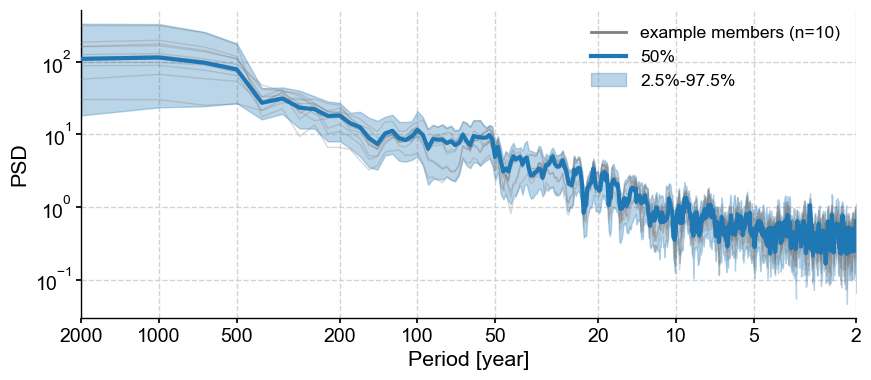

In [35]:
lmr_psd.plot_envelope(shade_clr = 'C0', curve_clr='C0')

#### Plot distribution
Some analysis methods assume that data have a normal distribution, so running `.histplot()` is a quick way to check whether this requirement is met for your `EnsembleSeries`. 

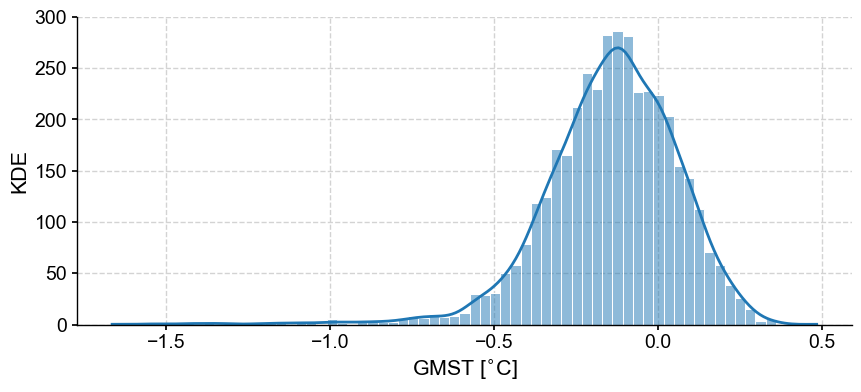

In [36]:
fig, ax = lmr_ens.sel(time=slice(1257, 1260)).histplot()

Notice how in this case we made use of the [sel()](https://pyleoclim-util.readthedocs.io/en/latest/core/api.html#pyleoclim.core.multipleseries.MultipleSeries.sel) method to select a specific time slice from the ensemble (in this case, years CE 1257 to 1260 inclusive). 